In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Wine_RegionColor.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine Region,Wine Color
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,Terras De Cister,Rose
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,Alentejo,Red
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,Alentejo,Red
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5,Setubal,White
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6,Terras De Cister,Red


In [6]:
#calculate correlation coef
corr_dict = {}
for var in df.columns[0:10]:
    corr_dict[var] = df[var].corr(df["quality"])
#convert to df and style
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Correlation Coefficient'])
corr_df = corr_df.style.highlight_min(axis=0, color='#f7bf70')
#save corr_df as png
corr_df.export_png('images/corr_df.png')

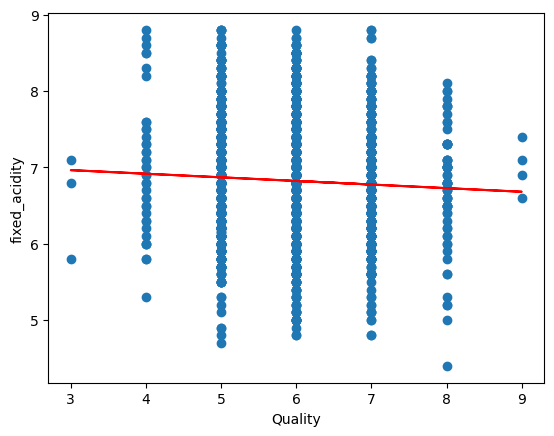

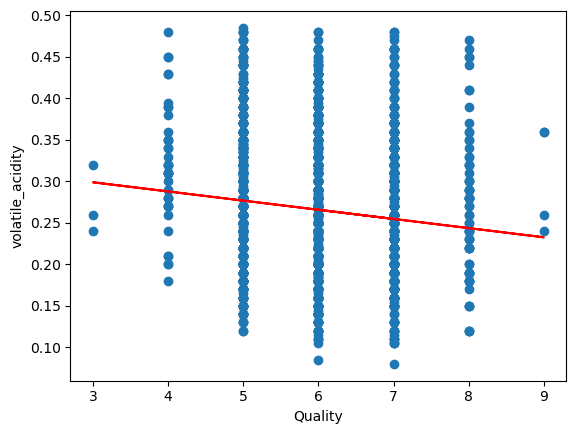

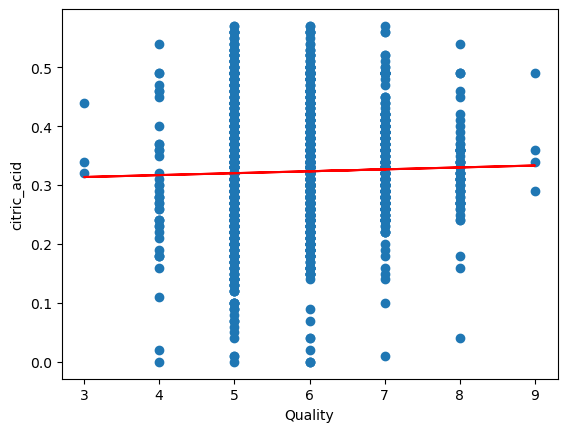

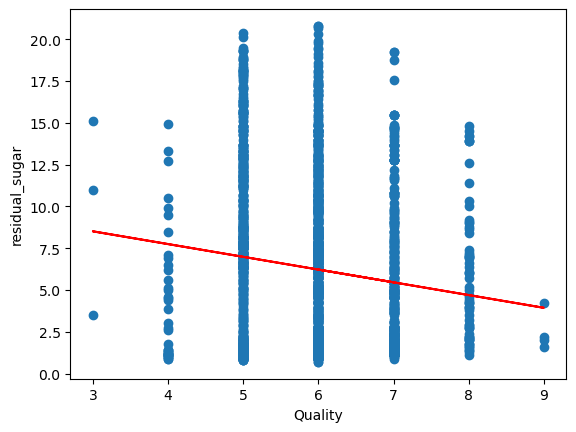

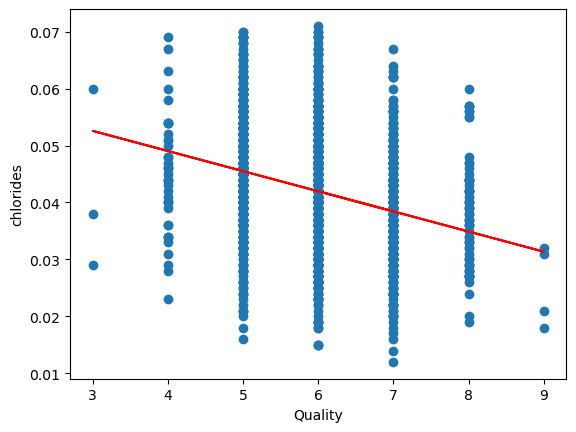

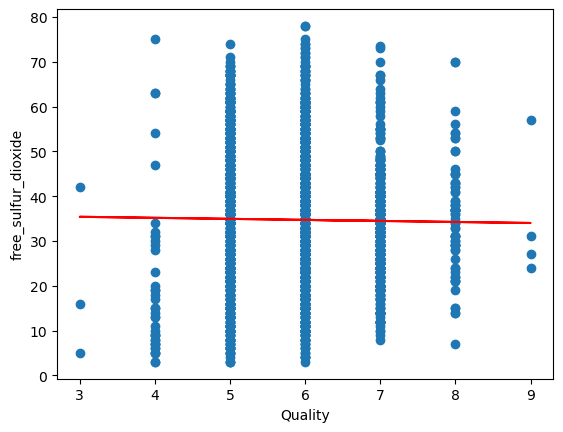

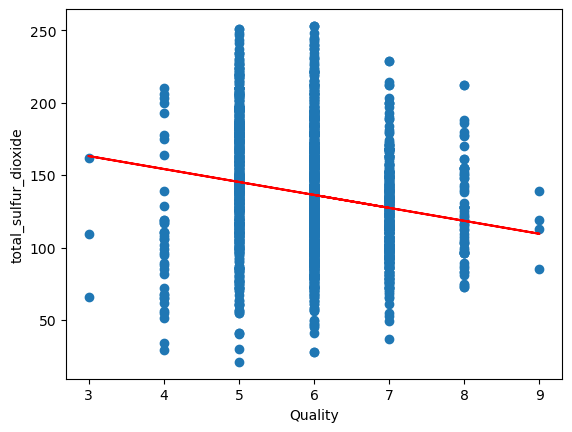

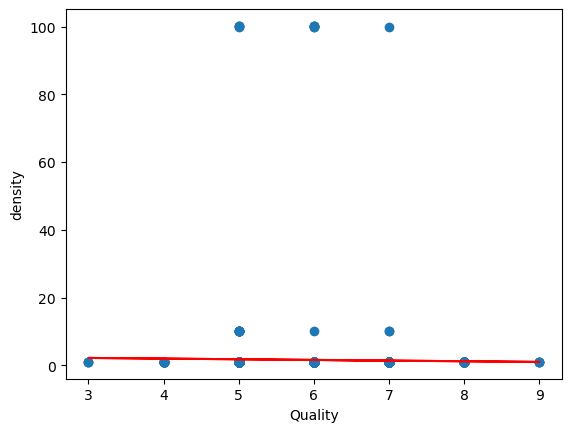

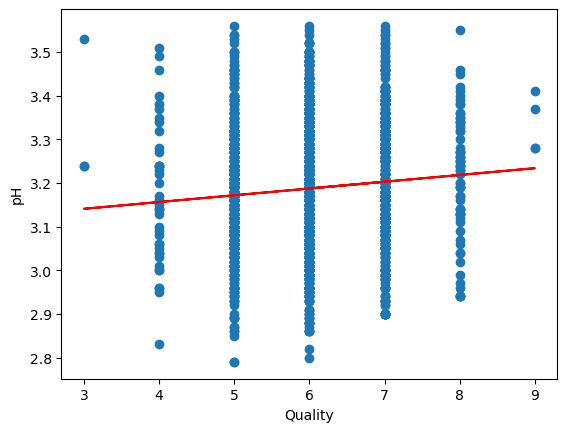

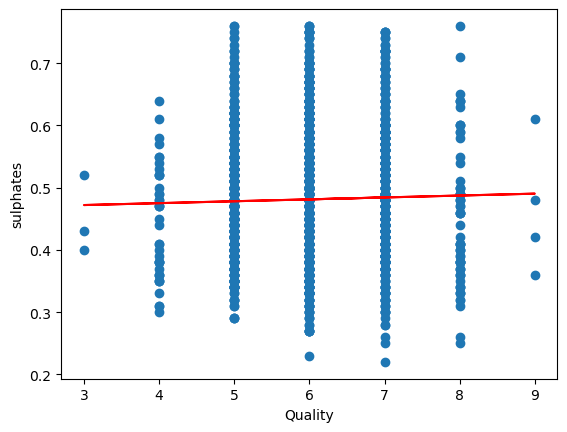

In [4]:
#create function that calculates linear regression for all of the vairables
def linear_regression_calc():
    
    for var in df.columns[0:10]:
        
        #define x and y
        X = df['quality']
        y = df[var]
        
        #reshape x 
        X_reshape = X.values.reshape(-1,1)
        y_reshape = y.values.reshape(-1,1)
        
        #fit model
        model = LinearRegression()
        model.fit(X_reshape, y_reshape)
        
        
        y_pred = model.predict(X_reshape)
        
        #correlation = np.corrcoef(X_reshape.flatten(), y_reshape.flatten())[0,1]
        #print(y_reshape.flatten())
        
        #plot
        plt.scatter(X_reshape, y_reshape)
        plt.plot(X_reshape, y_pred, color='red')
        plt.ylabel(var)
        plt.xlabel("Quality")
        #plt.legend(correlation)
        plt.show()
        
linear_regression_calc()